# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [21]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

def find_k_and_score(X: np.ndarray, y: np.ndarray, k: int = 0, score: float = 0.0, knn_type = None):
    """Find the the best n_neighbors and score for model

    Args:
        X (np.ndarray): data for model
        y (np.ndarray): data for model
        k (int, optional): the best n_neighbors for current model. Defaults to 0.
        score (float, optional): the best score for current model. Defaults to 0.0.
        knn_type (model, optional): current model. Defaults to None.

    Returns:
        int, float: returns the best n_neighbors and score
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=np.random.seed)
    print(len(y_train))
    for neighbor in range(1, len(y_train)):
        knn = knn_type(n_neighbors=neighbor)
        knn.fit(X_train, y_train)
        knn_score = knn.score(X_test, y_test)
        if knn_score > score:
            score = knn_score
            k = neighbor
    return k, score

In [23]:
k_best, score_best = find_k_and_score(X, y, knn_type=KNeighborsClassifier)
print (f'The best k = {k_best} , score = {score_best}')

112
The best k = 8 , score = 1.0


## Synthetic dataset  

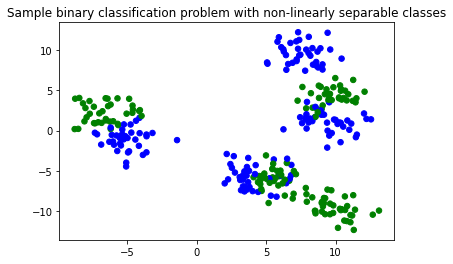

In [24]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(["blue", "#FFFF00", "black", "green"])

np.random.seed = 2021
X_D2, y_D2 = make_blobs(
    n_samples=300, n_features=2, centers=8, cluster_std=1.3, random_state=4
)
y_D2 = y_D2 % 2
plt.figure()
plt.title("Sample binary classification problem with non-linearly separable classes")
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker="o", s=30, cmap=cmap_bold)

In [25]:
k_best, score_best = find_k_and_score(X_D2, y_D2, knn_type=KNeighborsRegressor)
print (f'The best k = {k_best} , score = {score_best}')

225
The best k = 3 , score = 0.7447768281101614


In [26]:
# visualize decisiaon boundary
from matplotlib.colors import  ListedColormap
import matplotlib as mpl

custom_colors = [mpl.cm.viridis(.45),mpl.cm.viridis(.25)]
custom_cmap = ListedColormap(custom_colors)


# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_D2[:, 0].min() - 0.1, X_D2[:, 0].max() + 0.1
y_min, y_max = X_D2[:, 1].min() - 0.1, X_D2[:, 1].max() + 0.1

# Meshgrid creation
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Obtain labels for each point in mesh using model
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=np.random.seed)
knn = KNeighborsRegressor(k_best)
knn.fit(X_train[:,:2], y_train)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting
plt.figure()

plt.contourf(xx, yy, Z, cmap=custom_cmap)
plt.title("Decision boundary")
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, cmap=custom_cmap, edgecolor = 'black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()